In [1]:
# The MagPy jupyter Notebook manual with examples and usage
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
matplotlib.use('TkAgg')
%matplotlib inline

In [ ]:
# Chapter 1: Installation and requirements - is skipped here

In [ ]:
# ---------------------------------------
# Chapter 2: A quick guide to MagPy
# ---------------------------------------

[]
{}
Help on function read in module magpy.stream:

read(path_or_url=None, starttime=None, endtime=None, dataformat=None, datecheck=True, headonly=False, **kwargs)
    DEFINITION:
        The read functions tries to open the selected files. Calls on
        function _read() for help.
    
    PARAMETERS:
    Variables:
        - path_or_url:  (str) Path to data files in form:
                                a) c:/my/data/*"
                                b) c:/my/data/thefile.txt
                                c) /home/data/*
                                d) /home/data/thefile.txt
                                e) ftp://server/directory/
                                f) ftp://server/directory/thefile.txt
                                g) http://www.thepage.at/file.tab
        - headonly:     (?) ???
    Kwargs:
        - dataformat:   (str) Format of data file. Works as auto-detection.
        - disableproxy: (bool) If True, will use urllib2.install_opener()
        - endtime:

/home/leon/anaconda3/envs/jnmagpy/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/leon/anaconda3/envs/jnmagpy/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/leon/anaconda3/envs/jnmagpy/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/home/leon/anaconda3/envs/jnmagpy/lib/python3.11/site-packages/matplotlib/transforms.py:2039: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty


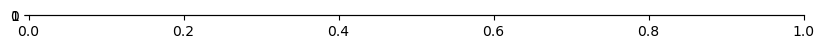

In [2]:
# 2.1 Getting started with the python package
# ----------------------

from magpy.stream import *

#Now we can use all methods of this module like reading files (see section 3) and working with the data. 

data = read(example1)

#MagPy has many more modules which will be described in detail below. If we want to plot the data we need the plotting
#module, which provides the method timeseries plot `tsplot`. Further information is found in section 4.

from magpy.core import plot as mp

#This is a "safe" import method as we do not shadow any other method. Using the module reference *mp* we can now use any
#method containd in the plotting module

mp.tsplot(data)


# 2.2 MagPy's internal data structure
# ----------------------

#You can view the array part as follows

print(data.ndarray)

#The header information is printed by

print(data.header)


# 2.3 Getting help on methods and modules
# ----------------------

#Information on individual methods and options can be obtained as follows:

help(read)

#For specific methods related to e.g. a stream object "data":

data = read(example1)
help(data.fit)

#Note that this requires the existence of a "data" object, which is obtained e.g. by data = read(...). The help text 
#can also be shown by directly calling the *DataStream* object method using:

help(DataStream().fit)

#Another example is shown here:

help(mp.tsplot)

In [ ]:
# ---------------------------------------
# 3. Reading and writing data
# ---------------------------------------

In [3]:
#MagPy supports many different data formats and thus also any possible conversions between them. 
#To get a full list including read/write support, use:

from magpy.stream import read, SUPPORTED_FORMATS
print(SUPPORTED_FORMATS)

# 3.1 Reading data
# ----------------------

#In order to read data from any local or remote data source the `read` method is used. This method is imported as 
#follows:

from magpy.stream import read

#Then you can access data sources using  data = read(datasource)
#Reading data from a remote webservice:

data = read('https://cobs.zamg.ac.at/gsa/webservice/query.php?id=WIC')

#The most effective way of selecting a specific time range is by already defining it when importing the data:

data = read(example4, starttime="2024-05-10", endtime="2024-05-11")

#You will find several example files provided with together with the MagPy package. In order to use the example files 
#it is recommended to import all methods of the `stream` package as follows:

from magpy.stream import *

#Then you can access all example files by just reading them as follows:

data = read(example1)

#- `example1`: [IAGA] ZIP (IAGA2002, zip compressed) file with 1 second HEZ data
#- `example2`: [MagPy] Archive (CDF) file with 1 sec F data
#- `example3`: [MagPy] Basevalue (TXT) ascii file with DI and baseline data
#- `example4`: [INTERMAGNET] ImagCDF (CDF) file with four days of 1 second data
#- `example5`: [MagPy] Archive (CDF) raw data file with xyz and supporting data

{'IAGA': ['rw', 'IAGA 2002 text format'], 'WDC': ['rw', 'World Data Centre format'], 'IMF': ['rw', 'Intermagnet Format'], 'IAF': ['rw', 'Intermagnet archive Format'], 'BLV': ['rw', 'IBFV2.0 Baseline format Intermagnet'], 'BLV1_2': ['rw', 'IBFV1.2 Baseline format Intermagnet'], 'IYFV': ['rw', 'Yearly mean format Intermagnet'], 'DKA': ['rw', 'K value format Intermagnet'], 'DIDD': ['rw', 'Output format from MinGeo DIDD'], 'GSM19': ['r', 'Output format from GSM19 magnetometer'], 'GFZINDEXJSON': ['r', 'JSON structure for indicies (i.e. Kp) at GFZ webservice'], 'COVJSON': ['rw', 'Coverage JSON'], 'LEMIHF': ['r', 'LEMI text format data'], 'LEMIBIN': ['r', 'Current LEMI binary data format'], 'LEMIBIN1': ['r', 'Deprecated LEMI binary format at WIC'], 'OPT': ['r', 'Optical hourly data from WIK'], 'PMAG1': ['r', 'Deprecated ELSEC from WIK'], 'PMAG2': ['r', 'Current ELSEC from WIK'], 'GDASA1': ['r', 'GDAS binary format'], 'GDASB1': ['r', 'GDAS text format'], 'RMRCS': ['r', 'RCS data output from Ri

In [ ]:
# 3.2 Writing
# ----------------------

#Let's create a quick example by loading some example data set and store it a CSV file. 

data = read(example1)
data.write('/tmp/', format_type='CSV', mode='replace', coverage='hour', filenamebegins='MYTEST_',
                           filenameends='.csv', dateformat='%Y%m%d%H', subdirectory='Yj', keys=['x'])

['IAGA', 'WDC', 'IMF', 'IAF', 'BLV', 'BLV1_2', 'IYFV', 'DKA', 'DIDD', 'COVJSON', 'PYSTR', 'PYASCII', 'CSV', 'IMAGCDF', 'PYCDF', 'LATEX']
 WDC read - skipping line [Created at Fri Feb 28 15:05:28 UTC 2025]



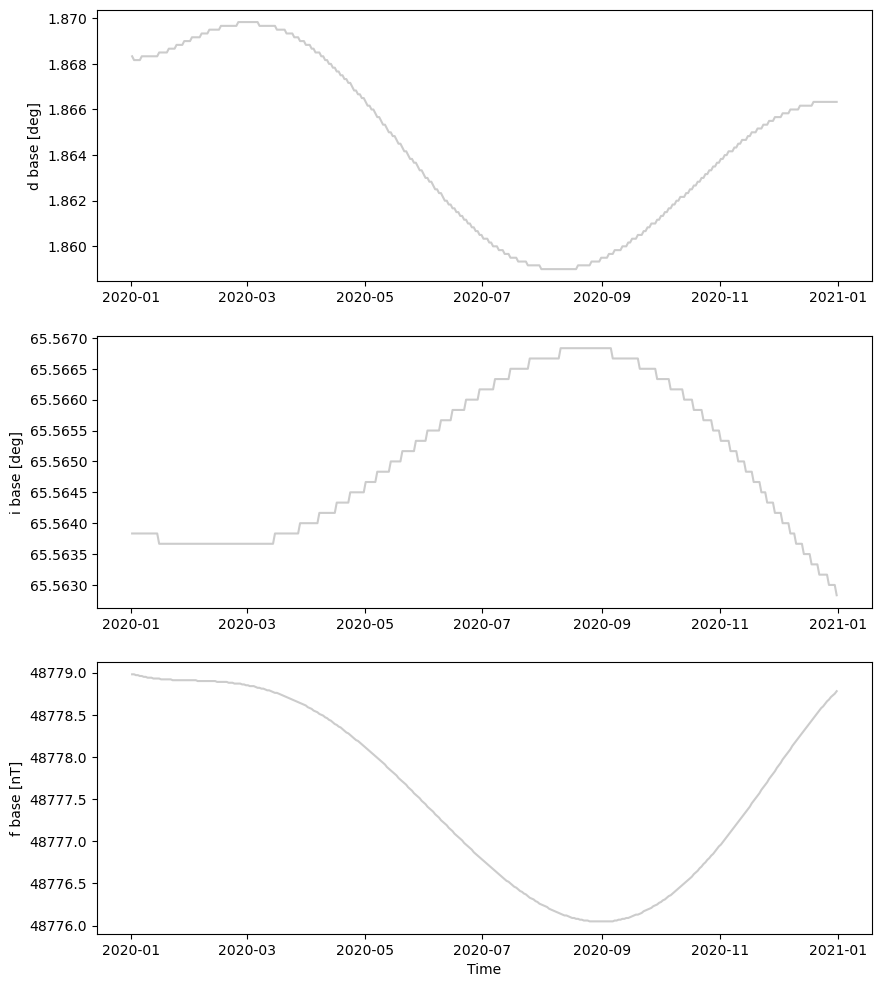

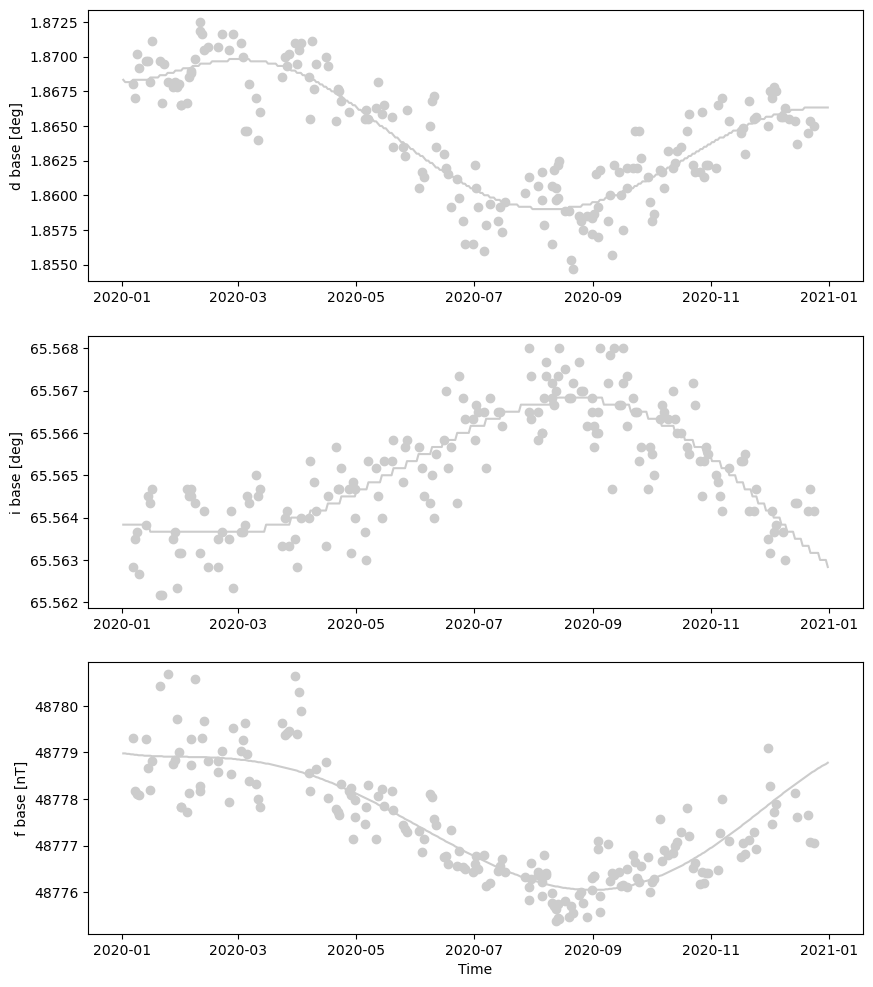

In [4]:
# 3.3 Specific commands and options for read and write
# ----------------------

#In order to get a full list of i.e. supported `write` types use the following example. Change 'w' 
#by 'r' to get `read` types. Please checkout the full readme file for all specfic options.

from magpy.stream import SUPPORTED_FORMATS
print([fo for fo in SUPPORTED_FORMATS if 'w' in SUPPORTED_FORMATS.get(fo)[0]])

# 3.3.1 Baseline information in IBFV files (BLV)

#How to access and plot such  basevalues and the adopted functions is shown here

basevalues = read(example7)
func = basevalues.header.get('DataFunctionObject')
mp.tsplot(basevalues, ['dx','dy','dz'], symbols=[['o','o','o']], functions=[[func,func,func]])

#If you are mainly interested in the adopted baseline data you can use the read *mode* 'adopted'.

adoptedbase = read(example7, mode='adopted')
mp.tsplot(adoptedbase, ['dx','dy','dz'])

#If you want to plot data and original adopted basevalues use

mp.tsplot([basevalues,adoptedbase], [['dx','dy','dz']], symbols=[['o','o','o'],['-','-','-']])


# 3.3.9 Reading data from the INTERMAGNET Webservice

#An important webservice is the [INTERMAGNET webservice](https://imag-data.bgs.ac.uk/GIN/) hosted at the British 
#Geological Survey (BGS). Below you will find a  typical example of an access using several available options. 

data = read('https://imag-data.bgs.ac.uk/GIN_V1/GINServices?request=GetData&observatoryIagaCode=WIC&dataStartDate=2021-03-10T00:00:00Z&dataEndDate=2021-03-11T23:59:59Z&Format=iaga2002&elements=&publicationState=adj-or-rep&samplesPerDay=minute')

# 3.3.10 Reading DST data

#Disturbed storm time indices are provided by [Kyoto](https://wdc.kugi.kyoto-u.ac.jp/dst_realtime/index.html) in a 
#world data center (WDC) related format. This data can be accessed as follows.

data = read("https://wdc.kugi.kyoto-u.ac.jp/dst_realtime/202411/dst2411.for.request")

# 3.3.11 The Conrad Observatory webservice

#The [Conrad Observatory](https://cobs.geosphere.at) provides an easy-to-use webservice using standardized options. 

data = read("https://cobs.zamg.ac.at/gsa/webservice/query.php?id=WIC")

# 3.3.12 The USGS webservice

#The [USGS webservice](https://www.usgs.gov/tools/web-service-geomagnetism-data) allows you accessing realtime data

data = read("https://geomag.usgs.gov/ws/data/?id=BOU")

# 3.3.13 Getting Index data from the GFZ Potsdam

data=read('https://kp.gfz-potsdam.de/app/json/?start=2024-11-01T00:00:00Z&end=2024-11-02T23:59:59Z&index=Kp')

# 3.3.14 Accessing the WDC FTP Server

data = read('ftp://ftp.nmh.ac.uk/wdc/obsdata/hourval/single_year/2011/fur2011.wdc')

# 3.3.15 NEIC data

quake = read('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.csv')

# 3.3.16 NOAA data: ACE, DSCOVR and GOES

ace = read("https://sohoftp.nascom.nasa.gov/sdb/goes/ace/daily/20221122_ace_swepam_1m.txt")

dscovr_plasma = read("http://services.swpc.noaa.gov/products/solar-wind/plasma-3-day.json")
dscovr_mag = read("http://services.swpc.noaa.gov/products/solar-wind/mag-3-day.json")

xray = read("https://services.swpc.noaa.gov/json/goes/primary/xrays-6-hour.json")

# 3.3.17 The webservice of ISGI: International Service of Geomagnetic Indices

# Please note: ontaining data from ISGI requires an access TOKEN. Please visit https://isgi.unistra.fr/ws_documentation.php for details

am_data = read("http://isgi.unistra.fr/ws?user=TOKEN&index=am&format=json&StartTime=2015-08-01&EndTime=2015-08-31")

In [ ]:
# ---------------------------------------
# 4. Figures
# ---------------------------------------

In [ ]:
# 4.1 A quick timeseries plot
# ----------------------

from magpy.stream import example1, read
from magpy.core import plot as mp

vario = read(example1)
mp.tsplot(vario)

In [ ]:
# 4.2 Timeseries: using some plot options and saving
# ----------------------

vario = read(example1)
fig, ax = mp.tsplot(vario,keys=['x','y','z'], title="Variometer data", grid=True, width=10, height=2)

#You can save this plot to a file using:

fig.savefig("/tmp/pl_421.png")

In [ ]:
# 4.3 Timeseries data from multiple streams
# ----------------------

scalar = read(example2)
fig,ax = mp.tsplot([vario,scalar],keys=[['x','y','z'],['f']], title="Variometer data", grid=True, width=10, 
                    height=2, yranges=[[[21000,21100],[400,500],[44100,44200]],[[48800,49000]]], ylabelposition=-0.1, 
                    dateformatter="%Y-%m-%d %H", legend=True, alpha=0.5,
                    fill=[[[],[{"boundary":0,"fillcolor":"red"},{"boundary":0,"fillcolor":"blue","fillrange":"smaller"}],[]],[[]]])

In [ ]:
# 4.4 Symbols and colors
# ----------------------

basevalue = read(example3)
fig,ax = mp.tsplot([basevalue],[['dx','dy','dz']], symbols=[['.','-.x','--o']], 
                    colors=[[[0.2, 0.2, 0.2],'r','blue']], padding=[[1,0.005,0.5]], height=2)

#In a next example we will plot the H components of three observatories. For this we load data from the USGS webservice.

data1 = read("https://geomag.usgs.gov/ws/data/?id=BOU")
data2 = read("https://geomag.usgs.gov/ws/data/?id=NEW")
data3 = read("https://geomag.usgs.gov/ws/data/?id=SIT")
fig,ax = mp.tsplot([data1,data2,data3],[['x'],['x'],['x']],colors=[['g'],['r'],['b']],legend=True,height=2)

#The obtained plot show the data on similar timescales below each other. ![4.2.4](./magpy/doc/pl_424.png "Geomag")
#If you want to plot them in a single diagram then just define a single key value.

fig,ax = mp.tsplot([data1,data2,data3], [['x']], colors=[['g'],['r'],['b']], legend={"legendtext":('BOU', 'SIT', 'NEW')}, height=2)

In [ ]:
# 4.5 Patches, annotations and functions in tsplot
# ----------------------

variometer = read(example4)
patch = {"ssc" : {"start":datetime(2024,5,10,17,6),"end":datetime(2024,5,10,17,8),"components":"x","color":"red","alpha":0.2},
                "initial": {"start":datetime(2024,5,10,17,8),"end":datetime(2024,5,10,19,10),"components":"x","color":"yellow","alpha":0.2},
                "main": {"start":datetime(2024,5,10,19,10),"end":datetime(2024,5,11,2,0),"components":"x","color":"orange","alpha":0.2},
                "recovery": {"start":datetime(2024,5,11,2,0),"end":datetime(2024,5,12,11),"components":"x","color":"green","alpha":0.2}}
fig,ax = mp.tsplot([variometer], keys=[['x']], patch=patch, annotate=True, height=2)

In [ ]:
# ---------------------------------------
# Chapter 5: Timeseries
# ---------------------------------------

In [ ]:
# 5.1 Get some basic data characteristics and commonly used manipulations
# ----------------------

data = read(example5)

#### 5.1.1 Basic data characteristics

# Lets firstly check what data is actually contained in the data stream.
# If you want to now which column keys are used in the current data set use

print (data.variables())

# Some basic column information, particluarly column name and units as asigned to each column key can be obtained by

print (data.get_key_name('x'))
print (data.get_key_unit('x'))

#The following command will give you a an overview about used keys and their asigned column names and units

data._print_key_headers()

#The amount of data in each column needs to be identical. You can check the length of all columns using

print(data.length())

#As all columns require the either the same length or zero length, you simply check the length of the time column
#for the total amount of individual timesteps. This will be returned by the classic len command

print(len(data))


#### 5.1.2 Modifying data columns

#The following methods allow you modifying individual data columns, move them to other keys or add some new information
#into your data set. Lets deal with another example for the following commands and extract data from key 'f' into a simple 
#numpy array:

fdata = read(example2)
fcolumn = fdata._get_column('f')
print (len(fcolumn))

#Now we create a new data column filled with random values and insert it into key 'x'

xcolumn = np.random.uniform(20950, 21000, size=len(fcolumn))
fdata = fdata._put_column(xcolumn,'x')

#Asign some variable name and unit to the new column and plot the new data set

fdata.header['col-x'] = 'Random'
fdata.header['unit-col-x'] = 'arbitrary'
mp.tsplot(fdata, height=2)

#Other possibly commands to move, copy or drop individual columns are as follwos

fdata = fdata._copy_column('x','var1')
fdata = fdata._move_column('var1','var2')
fdata = fdata._drop_column('var2')

#Creating a data set with selected keys can also be accomplished by

fdata = fdata._select_keys(['f'])

#If you want to extract data by some given threshold values i.e. get only data exceeding a certain value you should
#have a look at the `extract` method. The extract method requires three parameters: the first one defining the column/key name
#the second the threshold value, and the third one defines a comparator, which can be one of ">=", "<=",">", "<", "==", "!=",
#default is "==". You can also apply the extract method on columns containing strings but then only with "==".

extdata = fdata.extract("f" , 48625, ">")

#Columns consisting solely of NaN values con be dropped using

fdata = fdata._remove_nancolumns()

#A random subselection of data can be obtained using `randomdrop`. The percentage defines the amount of data to be reomved.
#You can also define indicies which cannot be randomly dropped, the first and last point in outr example below.

dropstream = data.randomdrop(percentage=50,fixed_indicies=[0,len(data)-1])


#As an example and for later we will add a secondary time column with a time shift to fdata

tcolumn = fdata._get_column('time')
newtcolumn = np.asarray([element+timedelta(minutes=15) for element in tcolumn])
fdata = fdata._put_column(newtcolumn,'sectime')
print (fdata.variables())


#### 5.1.3 All about time

# To extract time constrains use the following methods:
# Covered time range

print (data.timerange())
print (data.start())
print (data.end())

# The sampling period in seconds can be obtained as follows
print (data.samplingrate())

#Whenever you load data sets with MagPy the data will be sorted according to the primary time column
#You can manually repeat that anytime using

data = data.sorting()

#If you want to select specific time ranges from the already opened data set you can use the `trim`method

trimmeddata = data.trim(starttime='2018-08-02T08:00:00', endtime='2018-08-02T09:00:00')
print(" Timesteps after trimming:", len(trimmeddata))

#The trim method will create a new datastream containing only data from the selected time window. There is another
#mainly internally used method `_select_timerange` which will do exatcly the same as trim but returns only the
#data array (ndarray) without any header information 

ar = data._select_timerange(starttime='2018-08-02T08:00:00', endtime='2018-08-02T09:00:00')
print(" Datatype after select_timerange:", type(ar))
print(" Timesteps after _select_timerange:", len(ar[0]))

#Inversly you can drop a certain time range out of the data set by

ddata = data.remove(starttime='2018-08-02T08:00:00', endtime='2018-08-02T09:00:00')

#Please note that the remove command currently removes one point before starttime and endtime. This behavior
#will be corrected in a future version.

#Finally you can trim the given stream also by percentage or amount. This is done using the `cut`method and its
#options. By default `cut` is using percentage. The following command will cutout the last 50% of data

cutdata = fdata.cut(50,kind=0,order=0)
print(cutdata.timerange())

#Choosing option kind=1 will switch from percentage to amount and order=1 will take data from the beginning 
#of the data set

cutdata = fdata.cut(10,kind=1,order=0)
print(cutdata.timerange())

#The default key list of any MagPy data stream supports two time columns 'time' and 'sec_time'. The secondary time column
#might be used to store an alternative time reading i.e. GPS dates in the primary columns and NTP time in the secondary
#one. You can switch this columns using a single command.

shifted_fdata = fdata.use_sectime()

#If you want to get the line index number of a specific time step in your data series you can get it by

index = fdata.findtime("2018-08-02T22:22:22")
print(index)



In [ ]:
# 5.2 Coordinate transformation and rotations
# ----------------------

data = read(example5)

#### 5.2.1 Rotations

#Lets first look at our example data set. The example is provided in HEZ components. In order to convert HEZ into XYZ components we
#simply need to rotate the data set by the declination value. You can achieve that by using the `rotation` method

xyzdata = data.rotation(alpha=4.3)
xyzdata.header['DataComponents'] = 'XYZ'
xyzdata.header['col-x'] = 'X'
xyzdata.header['col-y'] = 'Y'
xyzdata.header['col-z'] = 'Z'
mp.tsplot(xyzdata, height=2)

#Vectorial data can be rotated using the `rotation` method by keeping F constant. Such rotations require just two angles which are referred to as *alpha* for rotations
#in the declination plane and *beta* for rotations in the inclination plane. Assume a simple vector x=4, y=0 and z=4. Rotation by alpha=45° will lead to x=2,y=2,z=4, a clockwise rotation.
#Rotating by beta=45° will rotate F into the X-Y plane with x=4, y=4, z=0. Please note: you need to supply xyz data when applying the `rotation` method.

rotdata = data.rotation(alpha=45,beta=45)

#### 5.2.2 Transforming coordinate systems

#Assuming vector data in columns x,y,z you can freely convert between cartesian *xyz*, cylindrical *hdz*, and spherical *idf* coordinates:

hdzdata = xyzdata.xyz2hdz()
mp.tsplot(hdzdata, height=2)

#The summary method `_convertstream` can also be used by giving the conversion type as option. The following conversions are possible: 'xyz2hdz','hdz2xyz','xyz2idf','idf2xyz':

xyzdata = hdzdata._convertstream('hdz2xyz')
mp.tsplot(xyzdata, height=2)

#The vectorial data columns as defined by the keys 'x','y','z' need to filled accordingly. i.e. a XYZ data stream has X in key 'x', Y in key 'y' and Z in key 'z', all with the same unit, usually nT in magnetism.
#A HDZ data stream as H assigned to key 'x', D in key 'y' and Z in key 'z'. H and Z are provided with the same unit (nT) and D has to be provided in degrees.decimals.
#IDF data contains I in key 'x', D in key 'y' and F in key 'z', with I and D provided in degree.decimals.


#### 5.2.3 Determining rotation angles

#If you have a measurement (XYZ data) and would like to obtain the rotation values regarding and expected reference direction defined by *referenceD* reference declination and
#*referenceI* inclination, both given in degree.decimals you can use the following method. Let us apply this method to the original rotdata, which
# contains the HEZ data set rotated by alpha and beta of 45 degree. The HEZ data has an expected decliation of 0 and and expected inclination
# of 64.4 degree. Please note that these values are not exact:

alpha, beta, gamma = rotdata.determine_rotationangles(referenceD=0.0,referenceI=64.4)
print (alpha, beta)

# The method will return angles with which rotdata needs to be rotated in order to get a non-rotated data set. Thus alpha and beta of -45 degree 
# will be obtained.



In [ ]:
# 5.3 Filtering and smoothing data
# ----------------------

data = read(example5)

#### 5.3.1 General filter options and resampling

#MagPy's `filter` uses the settings recommended by [IAGA]/[INTERMAGNET]. Ckeck `help(data.filter)` for further options 
#and definitions of filter types and pass bands. Here is short list of supported filter types:
#'flat','barthann','bartlett','blackman','blackmanharris','bohman','boxcar',
#'cosine','flattop','hamming','hann','nuttall','parzen','triang','gaussian','wiener','butterworth'
#Important options of the filter method, beside the chosen *filter_type* are *filter_width* which defines the window width
#in a timedelta object and the *resample_period* in seconds defining the resolution of the resulting data set.
#To get an overview over all filter_type and their basic characteristics you can run the following code. This will
#calculate filtered one-minute data and then calculate and plot the power spectral density of each filtered data set.
#Please note that we apply the *missingdata='interpolate'* option as the matplotlib.pyplot.psd method requires the data set
#being free of NaN values.

filterlist = ['flat', 'barthann', 'bartlett', 'blackman', 'blackmanharris', 'bohman',
                              'boxcar', 'cosine', 'flattop', 'hamming', 'hann', 'nuttall', 'parzen', 'triang',
                              'gaussian', 'wiener', 'butterworth']
for filter_type in filterlist:
    filtereddata = data.filter(filter_type=filter_type, missingdata='interpolate', filter_width=timedelta(seconds=120), resample_period=60)
    T = filtereddata._get_column('time')
    t = np.linspace(0,len(T),len(T))
    h = filtereddata._get_column('x') - filtereddata.mean('x')
    sr = filtereddata.samplingrate() # in seconds
    fs = 1./sr
    fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
    ax0.plot(t, h)
    ax0.set_xlabel('Time')
    ax0.set_ylabel('Signal')
    ax1.set_title(filter_type)
    power, freqs = ax1.psd(h, NFFT=len(t), pad_to=len(t), Fs=fs, scale_by_freq=True)
    plt.show()

#The `filter` method will resample the data set by default towards a projected period. In order to skip resampling choose option
#*noresample=True*. You can apply the resample method also to any data set as follows. Resample will extract values at the given
#sampling interval or take the linear interpolated value between adjacent data points if no value is existing at the given time
#step.

resampleddata = data.resample(['x','y','z'],period=60)
print(len(resampleddata))
print(resampleddata.timerange())


#### 5.3.2 Smoothing data

#The `smooth` method is similar to the filter method without resampling. It is a quick method with only a limited amount 
#of supported window types: flat, hanning (default), hamming, bartlett and blackman. The window length is given as number
#of data points. Smooth will throw an error in case of columns with only NaN values, so make sure to drop them before

data = data._remove_nancolumns()
smootheddata = data.smooth(window='hanning', window_len=11)

#### 5.3.3 Filtering in geomagnetic applications

#When dealing with geomagnetic data a number of simplifications have been added into the application. To filter the data 
#set with default parameters as recommended by IAGA you can skip all the options and just call `filter`.
#It automatically chooses a gaussian window with the correct settings depending on the provided sampling rate of the data 
#set and filter towards the next time period i.e. if you supply 1sec, 5 sec or 10 sec period data they will be filtered to 1 min.
#Therefore in basically all geomagnetic applications the following command is sufficient

filtereddata = data.filter()

#Get sampling rate and filtered data after filtering (please note that all filter information is added to the data's meta information dictionary (data.header):

print("Sampling rate after [sec]:", filtereddata.samplingrate())
print("Filter and pass band:", filtereddata.header.get('DataSamplingFilter',''))

#### 5.3.4 Frequnecy analysis and missing data

#When dealing with geomagnetic data, especially when it comes to the frequency domain, then the treatment of missing data and
#is of particluar importance. The time domain should be evenly distributed and misisng data needs to be adequatly 
#considered. Missing data is often replaced by unrealistic numerical values like 99999 or negative data. MagPy is using 
#NaN values instead to internally treat such missing data. Two methods are available to help you preparing your data
#for frequency analysis. The `get_gaps` method (section 5.9.2) will analyse the time column and identify any missing time steps for an 
#equally distant time scale. Time steps will be filled in and NaNs will be added into the data columns. In order to deal 
#with NaN values you can use filtering procedures as shown above or use the `interpolate_nan` method (section 5.9.2), 
#which will linearly interpolate NaNs. Please be careful with these techniques as you might create spurious signals when interpolating. 

data = data.get_gaps()
data = data.interpolate_nans(['x'])

#The power spectral density can then be analyzed using build in python matplotlib methods. First extract time and data column.

T = data._get_column('time')
print (len(T))
t = np.linspace(0,len(T),len(T))
h = data._get_column('x')
sr = data.samplingrate() # in seconds
fs = 1./sr

#Then plot timeseries of the selected data and psd.

fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
ax0.plot(t, h)
ax0.set_xlabel('Time')
ax0.set_ylabel('Signal')
power, freqs = ax1.psd(h, NFFT=len(t), pad_to=len(t), Fs=fs, detrend='mean', scale_by_freq=True)
plt.show()


#### 5.3.4 Quickly get daily mean values

#Another method which belongs basically to the filter section is the the `dailymeans` method which allow you to 
#quickly obtain dailymean values according to IAGA standards from any given data set covering at least one day.
#Acceptable sind all data resolutions as the dailymeans will filter the data stepwise until daily mean values.

dailymeans = data.dailymeans()



In [ ]:
# 5.4 Calculating vectorial F and delta F
# ----------------------

#Vectorial F can be easily calculated if the vectorial keys x,y,z are available. Lets start with examples1
#from the provided data sets. Example1 contains a column filled with nan values for testing purposes.
#We first remove this column (see also 5.1.2). 

data = read(example1)
data = data._remove_nancolumns()

#Afterwards we check the available keys in the data set and see that x,y,z 
#are available, a prerequisite to calculate the vector sum. We can also check what components are actually 
#stored below keys x,y,z by checking the data's meta information. HEZ is perfectly fine for calculating
#the vector sum.

print(data.variables())
print(data.header.get('DataComponents'))

#The command 'calc_f` is now performing the calculation of the vector sum and stores it with key f

data_with_F_v = data.calc_f()

#Mostly however you will be interested not in vectorial F (F_V) but in delta values between F_V and a scalar F (F_S).
#Lets read an independent F data set from example2, which covers a similar time range as vectorial data from example1.

fdata = read(example2)

#Let us assume you have two data sources variodata with X,Y,and Z data as well as scalardata with F. 
#Make sure that both data sets cover the same time range and are sampled at the same frequency and time steps

combineddata = merge_streams(data,fdata)   # checkout section 5.10 for details

#Now the data file contains xyz (hdz, idf) data and an independently measured f value. You can calculate delta F 
#between the two instruments using the following:

combineddata = combineddata.delta_f()

#Combined data will now contain an additional column at key 'df' containing F_v - F_s, 
#the scalar pier difference as defined within the IM technical manual. The delta F values will added 
#to key/column df:

mp.tsplot(combineddata, keys=['x','y','z','f','df'], height=2)


In [ ]:
# 5.5 Mean, amplitudes and standard deviation
# ----------------------

data = read(example1)

#Mean values for certain data columns can be obtained using the `mean` method. The mean will only be 
#calculated for data with the percentage of valid data points. By default 95% of vaild data is required. 
#You can change that by using the percentage option. In case of too many missing data points, then no mean 
#is calulated and the function returns NaN.

print(data.mean('x', percentage=80))

#If you want also the standard deviation use option *std*:

print(data.mean('x', percentage=80, std=True))

#The median can be calculated by defining the `meanfunction` option:

print(data.mean('x', meanfunction='median'))

#The amplitude, the difference between maximum and minimum, can be obtained as follows

print(data.amplitude('x'))

#Just maximum and minimum values can be obtained with these methods

print("Maximum:", data._get_max('x'))
print("Minimum:", data._get_min('x'))

#If you just need the variance you can either square the standrad deviation or use the `_get_variance` method

print("Variance:", data._get_variance('x'))


In [ ]:
# 5.6 Offsets and Scales
# ----------------------

data = read(example1)

#### 5.6.1 Offsets

#Constant offsets can be added to individual columns using the `offset` method with a dictionary defining 
#the MagPy stream column keys and the offset to be applied (datetime.timedelta object for time column, float for all others):

offsetdata = data.offset({'time':timedelta(seconds=0.19),'f':1.24})

#### 5.6.2 Scaling

#Individual columns can also be multiplied by values provided in a dictionary:

multdata = data.multiply({'x':-1})



In [ ]:
# 5.7 Derivatives and integrating
# ----------------------

data = read(example1)

#Time derivatives, which are useful to identify outliers and sharp changes, are calculated based on successive
#gradients based on numpy gradient. By using the option *put2keys* you can add the derivative to columns of your
#choice. By default they are added to dx,,dy, dz, df.

diffdata = data.derivative(keys=['x','y','z'],put2keys = ['dx','dy','dz'])
mp.tsplot(diffdata,keys=['x','dx'], height=2)

#We can also integrate the curve again based on scipy.integrate.cumtrapz. Use the `integrate`method for this purpose.
#Integrate can only be applied to keys x,y,z,f and puts integrated data into columns dx,dy,dz,df. So sometimes you will
#need to move data into the projected columns first. In the following we will move one of the earlier derivated
#columns towards x and then integrate. The correct scaling cannot be reconstructed and needs to be adjusted separetly

diffdata._move_column('dx','x')
test = diffdata.integrate(keys=['x','y','z'])
mp.tsplot(test,keys=['dx'], height=2)


In [ ]:
# 5.8 Extrapolation
# ----------------------

#The extrapolation method `extrapolate` allows to extrapolate a  data set towards given start and end times. Several 
#different methods are available for extrapolation: The most simple extrapolation method, which was already available
#in MagPy 1.x is the duplication method (option: *method='old'*) which duplicates the first and last existing points 
#at given times. New methods starting form 2.0 are the *'spline'* technique following 
#[this](https://docs.scipy.org/doc/scipy/tutorial/interpolate/extrapolation_examples.html) approach, a *'linear'* 
#extrapolation and a *'fourier'* technique as described [here](https://gist.github.com/tartakynov/83f3cd8f44208a1856ce).
#Please note: the extrapolation method will remove any NaN columns and secondary time columns.

data = read(example5)
shortdata = data.trim(starttime='2018-08-29T09:00:00', endtime='2018-08-29T14:00:00')
extdata = shortdata.extrapolate(starttime=datetime(2018,8,29,7), endtime=datetime(2018,8,29,16), method='fourier')

#The different techniques will result in schemes as displayed in the following diagrams (not the example above):



In [ ]:
# 5.9 Functions
# ----------------------

data = read(example5)

#### 5.9.1 Fitting data

#MagPy offers the possibility to fit functions to data using a number of different fitting functions:

func = data.fit(keys=['x','y','z'], fitfunc='spline', knotstep=0.1)
mp.tsplot([data],[['x','y','z']],functions=[[func,func,func]])

#Supported fitting functions *fitfunc* are polynomial 'poly', 'harmonic', 'least-squares', 'mean', 'spline'. The default 
#fitting method is the cubic spline function 'spline'. You need to specific the option *fitdegree* for polynomial and 
#harmonic fitting functions. *fitdegree*=1 corresponds to a linear fit. Default value is 5. For *fitfunc*='spline' you 
#need to specify an average spacing for knots. The *knotstep* parameter will define at which percental distance a knot 
#should be located. i.e. *knotstep*=0.33 would place altogether 2 knots at 33% within the timeseries. Smaller values 
#will increase the number of knots and thus the complexity of the fit. Thus, *knotstep* need to contain a positive 
#number below 0.5.

#### 5.9.2 Interpolation

#The interpol method uses Numpy's interpolate.interp1d to interpolate values of a timeseries. The option *kind* defines 
#the type of interpolation. Possible options are 'linear' (default), 'slinear ' which is a first order spline, 
#'quadratic' = spline (second order), 'cubic' corresponding to a third order spline, 'nearest' values and 'zero'. The 
#interpolation method can be used to interpolate missing data. Lets create put some data gaps into our example data set
#for demonstration. We will use randomdrop to remove some data lines and then use `get_gaps` to identify this lines and
#insert timesteps, but leaving values as NaN. Finally we can then interpolate missing data 

discontinuousdata_with_gaps = data.randomdrop(percentage=10,fixed_indicies=[0,len(data)-1])
print("Before: {}, After randdrop: {}".format(len(data), len(discontinuousdata_with_gaps)))
continuousdata_with_gaps = discontinuousdata_with_gaps.get_gaps()

contfunc = continuousdata_with_gaps.interpol(['x','y'],kind='linear')
mp.tsplot([continuousdata_with_gaps],[['x','y','z']],functions=[[contfunc,contfunc,None]])

#Another simple interpolation method allows for a quick linear interpolation of values, directly modifying the supplied 
#timeseries (see also section 5.3.4).

interpolatedts = continuousdata_with_gaps.interpolate_nans(['f'])

#### 5.9.3 Adopted baselines

#Baselines are also treated as functions in MagPy. You can calculate the adopted baseline as follows. A more detailed 
#description, also highlighting options for adopted baseline functions and jumps and all other aspects of
#adopted baseline fitting are given in section 7.5. The baseline method will add functional parameter and basevalues
#into the data header of variodata. You find these meta information in header keys 'DataAbsInfo' and
#'DataBaseValues'. 'DataAbsInfo' contains the functional parameters of which the first two elements of each
# function list describe the time range given in numerical matplotlib.dates.

variodata = read(example1)
basevalues = read(example3)
func = variodata.baseline(basevalues)

#### 5.9.4 Functions within a DataStream object

#The full function objects can be added to the timeseries meta information dictionary and stored along with the data set. Such Object 
#storage is only supported for MagPy's PYCDF format. To add functions into the timeseries data header use:

variodata = variodata.func2header(func)

#When reading PYCDF data files and also INTERMAGNET IBLV data files then functional values (adopted baselines of BLV 
#files) are available in the header. Access it as follows:

blvdata = read(example7)
func = blvdata.header.get('DataFunctionObject')
mp.tsplot([blvdata],[['dx','dy','dz']], symbols=[['.','.','.']], padding=[[0.005,0.005,2]], colors=[[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], functions=[[func,func,func]], height=2)


#### 5.9.5 Applying functions to timeseries

#Functions can be transferred to data values and they can be subtracted for residual analysis. Use method func2stream 
#for this purpose. You need to supply the functions to func2stream, define the keys and a mode on how functions are 
#applied to the new timeseries. Possible modes are 'add', 'sub' for subtracting, 'div' for division, 'multiply' and
#'values' to replace any existing data by function values. In order to analyse residuals for a adopted baseline function 
#you would do the following: 

residuals = blvdata.copy()
residuals = residuals.func2stream(func, keys=['dx','dy','dz','df'],mode='sub')
print (" Get the average residual value:", residuals.mean('dy',percentage=90))
mp.tsplot([residuals],[['dx','dy','dz']], symbols=[['.','.','.']], height=2)

#Replacing existing data by interpolated values can be accomplished using the `func2stream` method. Just recall the example
#of 5.9.2, where we filled gaps by interpolation. Know we replace all existing inputs (data and NaNs) 
#by interpolated values

contfunc = continuousdata_with_gaps.interpol(['x','y','z'],kind='linear')
data = data.func2stream(contfunc, keys=['x','y','z'],mode='values')

#### 5.9.6 Saving and reading functions separatly

#It is possible to save the functional parameters (NOT the functions) to a file and reload them for later usage. Please 
#note that you will need to apply the desired fit/interpolation/baseline adoption again based on these parameters to 
#obtain a function object. The parameters will be stored within a json dictionary.

func_to_file(contfunc, "/tmp/savedparameter.json")

#To read parameters in again 

funcparameter = func_from_file("/tmp/savedparameter.json")

#The variable funcparameters will then contain a dictionary with all contents of the original function list, including 
#time ranges and specific parameters for each value. Extract these values by standard dict.get() and reapply to the data 
#stream. 


In [ ]:
# 5.10 Multiple timeseries
# ----------------------

def create_minteststream(startdate=datetime(2022, 11, 1), addnan=True):
        c = 1000  # 4000 nan values are filled at random places to get some significant data gaps
        l = 32 * 1440
        #import scipy
        teststream = DataStream()
        array = [[] for el in DataStream().KEYLIST]
        win = signal.windows.hann(60)
        a = np.random.uniform(20950, 21000, size=int(l / 2))
        b = np.random.uniform(20950, 21050, size=int(l / 2))
        x = signal.convolve(np.concatenate([a, b], axis=0), win, mode='same') / sum(win)
        if addnan:
            x.ravel()[np.random.choice(x.size, c, replace=False)] = np.nan
        array[1] = x[1440:-1440]
        a = np.random.uniform(1950, 2000, size=int(l / 2))
        b = np.random.uniform(1900, 2050, size=int(l / 2))
        y = signal.convolve(np.concatenate([a, b], axis=0), win, mode='same') / sum(win)
        if addnan:
            y.ravel()[np.random.choice(y.size, c, replace=False)] = np.nan
        array[2] = y[1440:-1440]
        a = np.random.uniform(44300, 44400, size=l)
        z = signal.convolve(a, win, mode='same') / sum(win)
        array[3] = z[1440:-1440]
        array[4] = np.sqrt((x * x) + (y * y) + (z * z))[1440:-1440]
        array[0] = np.asarray([startdate + timedelta(minutes=i) for i in range(0, len(array[1]))])
        array[KEYLIST.index('sectime')] = np.asarray(
            [startdate + timedelta(minutes=i) for i in range(0, len(array[1]))]) + timedelta(minutes=15)
        teststream = DataStream(header={'SensorID': 'Test_0001_0001'}, ndarray=np.asarray(array, dtype=object))
        minstream = teststream.filter()
        teststream.header['col-x'] = 'X'
        teststream.header['col-y'] = 'Y'
        teststream.header['col-z'] = 'Z'
        teststream.header['col-f'] = 'F'
        teststream.header['unit-col-x'] = 'nT'
        teststream.header['unit-col-y'] = 'nT'
        teststream.header['unit-col-z'] = 'nT'
        teststream.header['unit-col-f'] = 'nT'
        return teststream


data1 = create_minteststream(startdate=datetime(2022, 11, 1))
data2 = create_minteststream(startdate=datetime(2022, 11, 15))
data1.ndarray[1][31000:33000] = np.nan
data2.ndarray[1][5000:9000] = np.nan

# Join
join1 = join_streams(data1,data2)
p1 = mp.tsplot([data2,data1],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data2", "data1"]}, height=2)
#p1.savefig("./ms_data.png")
p2 = mp.tsplot([join1],[['x','f']],colors=[[[0.2, 0.2, 0.2],[0.2, 0.2, 0.2]]], title="joined", height=2)
join2 = join_streams(data2,data1)
p1 = mp.tsplot([data2,data1],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data2", "data1"]}, height=2)
#p1.savefig("./ms_data.png")
p2 = mp.tsplot([join2],[['x','f']],colors=[[[0.2, 0.2, 0.2],[0.2, 0.2, 0.2]]], title="joined", height=2)

# Merge
merge1 = merge_streams(data1,data2)
p1 = mp.tsplot([data2,data1],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data2", "data1"]}, height=2)
#p1.savefig("./ms_data.png")
p2 = mp.tsplot([merge1],[['x','f']],colors=[[[0.2, 0.2, 0.2],[0.2, 0.2, 0.2]]], title="merged", height=2)
#p2.savefig("./ms_merge.png")
merge2 = merge_streams(data2,data1, keys=['x'])
p = mp.tsplot([data2,data1],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data2", "data1"]}, height=2)
p3 = mp.tsplot([merge2],[['x']],colors=[[[0.2, 0.2, 0.2]]], title="merged", height=2)

# Subtract
sub1 = subtract_streams(data1,data2)
p1 = mp.tsplot([data2,data1],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data2", "data1"]}, height=2)
#p1.savefig("./ms_data.png")
p2 = mp.tsplot([sub1],[['x','f']],colors=[[[0.2, 0.2, 0.2],[0.2, 0.2, 0.2]]], title="subtract", height=2)
#p2.savefig("./ms_merge.png")

# Time shifts between two data sets
shifted_stream = data1.copy()
shifted_stream = shifted_stream.use_sectime()
data1 = data1.trim("2022-11-22T00:00:00","2022-11-23T00:00:00")
shifted_stream = shifted_stream.trim("2022-11-22T00:00:00","2022-11-23T00:00:00")

p1 = mp.tsplot([data1,shifted_stream],[['x','f']],colors=[[[0.8, 0.8, 0.8],[0.8, 0.8, 0.8]],[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]]], legend={"legendtext" : ["data1", "shifted data1"]}, height=2)

shift = determine_time_shift(data1,shifted_stream, col2compare='f',method='all', debug=True)


In [ ]:
# ---------------------------------------
# Chapter 6: Annotating data and flagging
# ---------------------------------------

In [ ]:
# 6.1. Flagging basics
# ----------------------
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.core import flagging

fl = flagging.Flags()

#Add flags to this object

fl = fl.add(sensorid="LEMI025_X56878_0002_0001", starttime="2022-11-22T16:36:12.654362",
                    endtime="2022-11-22T16:41:12.654362", components=['x', 'y', 'z'], labelid='020', flagtype=4,
                    comment="SSC with an amplitude of 40 nT", operator='John Doe')
fl = fl.add(sensorid="GSM90_Y1112_0001", starttime="2022-11-22T10:56:12.654362",
                          endtime="2022-11-22T10:59:12.654362", components=['f'], flagtype=3, labelid='050')
fl = fl.add(sensorid="GSM90_Y1112_0001", starttime="2022-11-22T10:58:12.654362",
                          endtime="2022-11-22T11:09:45.654362", components=['f'], flagtype=3, labelid='050')
fl = fl.add(sensorid="LEMI025_X56878_0002_0001", starttime="2022-11-22T20:59:13.0",
                    endtime="2022-11-22T20:59:14.0", components=['x', 'y', 'z'], labelid='001', flagtype=3,
                    operator='John Doe')

#You can get a formated output of the flagging contents by 

fl.fprint(sensorid="LEMI025_X56878_0002_0001")

#You might want to limit the output to specific sensorids by providing the Sensor ID as option. If you want to modify 
#flags and keep the original state in the memory use the copy method

orgfl = fl.copy()

#A number of methods are available for modifying and extracting flagging information. You can extract specific
#information for any content (field):

lightningfl = fl.select('comment', ['lightning'])

#You can also select a specific time range by using the trim method

timefl = fl.trim(starttime='2022-11-22T09:00:00', endtime='2022-11-22T11:00:00')

#Combination of different flagging objects is possible as follows

comb = timefl.join(lightningfl)

#Sometime you are interested in the differences of two flagging objects

diff = comb.diff(fl)

#Flags defined by a parameter (field) and searchterms for this parameter can be dropped from the flagging object

newfl = fl.drop(parameter='sensorid', values=['GSM90_Y1112_0001'])

#Specific contents associated to a given field can be replaced 

flmodified = fl.replace('stationid', '', 'WIC')

#Time ranges of overlapping flags can be combined using the `union` method. 

combfl = fl.union(samplingrate=1, level=0)

# Rename nearby data

renamedfl = fl.rename_nearby(parameter='labelid', values=['001'])

# some general information 

mintime, maxtime = fl.timerange()

fl.stats(level=1)

# if you want to connect and save flagging information together with data stream then add the flagging object 
# into the data header of the data stream

data = DataStream()
data.header["DataFlags"] = fl


In [ ]:
# 6.2. Flagging outliers
# ----------------------
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
from magpy.core import flagging
%matplotlib widget

datawithspikes = read(example1)
datawithspikes = datawithspikes._remove_nancolumns()

#Mark all spikes using the automated function `flag_outlier` with default options and return a flagging object:

fl = flagging.flag_outlier(datawithspikes, timerange=60, threshold=1.5, markall=True)

#Drop flagged data from the "disturbed" data set.

datawithoutspikes = fl.apply_flags(datawithspikes)

#Show original data in grey, cleand data in black and flagging ranges in a single plot:

fig, ax = mp.tsplot([datawithspikes,datawithoutspikes], [['x','y','z']], colors=[['r','r','r'],['grey','grey','grey']], height = 2)

fig.savefig("/tmp/fl_outlier.png")

In [ ]:
# 6.3. Flagging ranges
# ----------------------
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
from magpy.core import flagging
%matplotlib widget

#The load a data record and firstly add a flagging range in time.

data = read(example1)

timefl = flagging.flag_range(data, keys=['x'], 
                                     starttime='2018-08-02T14:30:00', 
                                     endtime='2018-08-02T15:15:00', 
                                     flagtype=3, 
                                     labelid='051', 
                                     text="iron maiden dancing near sensor",
                                     operator="Max Mustermann")

#We also will flag values exceeding a given threshold in the same data set:

valuefl = flagging.flag_range(data, keys=['x'], 
                                  above=21067,
                                  flagtype=0,
                                  labelid='000',
                                  text="interesting values for later discussion",
                                  operator="Mimi Musterfrau")

#For displaying put these flags together using the `join`method:

fl = valuefl.join(timefl)

#Create graphical patches for displaying this flagging information:

p = fl.create_patch()

#Show flagged data in a plot:

fig, ax = mp.tsplot(data,['x'],patch=p, annotate='labelid', height=2)
fig.savefig("/tmp/fl_range.png")

In [ ]:
# 6.4. Flagging binary states
# ----------------------
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
from magpy.core import flagging
%matplotlib widget

#The load a data record and firstly add a flagging range in time.

data = read(example1)

# add somw artifical binary data i.e. a light switch

var1 = [0]*len(data)
var1[43200:50400] = [1]*7200
data = data._put_column(np.asarray(var1), 'var1')

# flag column x based on the switching state of column var1. By default status changes are flagged.
# The option *markallon' will additionally mark the full time range containing 1 in var1.

fl = flagging.flag_binary(data, key='var1', keystoflag=["x"],
                                     flagtype=3, 
                                     text="light switch affecting signal",
                                     markallon=True)

#Create graphical patches for displaying this flagging information:

p = fl.create_patch()

#Show flagged data in a plot:

fig, ax = mp.tsplot(data,['x'],patch=p, height=2)
#fig.savefig("/home/leon/Downloads/fl_binary.png")

In [ ]:
# 6.5. Converting stream data to flagging information
# ----------------------
import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
from magpy.core import flagging
#%matplotlib widget


# Lets load some data from a suspended magnetometer. Such data might be affected by nearby earthquakes

yesterday = datetime.now() - timedelta(1)
today = datetime.now()
data = read("https://cobs.zamg.ac.at/gsa/webservice/query.php?id=WIC&starttime={}&endtime={}".format(yesterday.date(),today.date()))
print ("Got {} data points for data set with sensorid {}".format(len(data),data.header.get('SensorID')))

# Get some information on earthquakes

quake = read('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.csv')

# Here you might want to filter the earthquake data and select only nearby shakes - described elsewhere

# Trim the earthquake information to the same timerange as the data set

quake = quake.trim(starttime="{}".format(yesterday.date()),endtime="{}".format(today.date()))
print ("Found {} earthquakes".format(len(quake)))

# Transform quake data to a flagging object. Please note that we assign this flagging information to a group of instruments
# The group contains xyz keys of the data set imported above.

fl = flagging.convert_to_flags(quake, flagtype=2, labelid='030', commentkeys=['M','f',' - ','str3'], groups={data.header.get('SensorID'):['x','y','z']})

# Lets get a formated output of the flagging contents

fl.fprint(sensorid=quake.header.get('SensorID'))

# Then create some patches for the variometer data 

p = fl.create_patch(data)

#Show flagged data in a plot:

fig, ax = mp.tsplot(data, ['x'], patch=p, height=2)
#fig.savefig("/home/leon/Downloads/fl_quakes.png")

In [ ]:
# 6.6. Saving and loading flagging information
# ----------------------

import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import flagging

# Lets create a small flagging object
fl = flagging.Flags()
fl = fl.add(sensorid="LEMI025_X56878_0002_0001", starttime="2022-11-22T16:36:12.654362",
                    endtime="2022-11-22T16:41:12.654362", components=['x', 'y', 'z'], labelid='020', flagtype=4,
                    comment="SSC with an amplitude of 40 nT", operator='John Doe')
fl = fl.add(sensorid="GSM90_Y1112_0001", starttime="2022-11-22T10:56:12.654362",
                          endtime="2022-11-22T10:59:12.654362", components=['f'], flagtype=3, labelid='050')

#save this object

fl.save("/tmp/myflags.json")

# In order to load flagging data use the `load` method of the flagging package

fo = flagging.load("/tmp/myflags.json")

# The load method can also be used for old flagging data - the debug option might provide some info if anything is not working

#fold = flagging.load("/tmp/myoldflags.json", debug=True)

# Saving data with flags together

data = read(example1)
fl = flagging.flag_outlier(data, timerange=120, threshold=3, markall=True)

#Now we need to apply the flagging object to the data and insert flagging information directly into the data stream

datawithflags = fl.apply_flags(data, mode='insert')

#And then we can save this data set with flagging data included as CDF.

datawithflags.write('/tmp/',filenamebegins='MyFlaggedExample_', format_type='PYCDF')

#To check for a correct saving procedure, read and extract flagging info:

fldata = read("/tmp/MyFlaggedExample_*")



In [ ]:
# 6.7. Advanced flagging operations
# ----------------------

import sys
sys.path.insert(1,'/home/leon/Software/magpy/') # should be magpy2
from magpy.stream import *
from magpy.core import plot as mp
from magpy.core import flagging
%matplotlib widget

data = read(example1)
data = data._drop_column('f')
data = data._drop_nans('x')
data = data._drop_nans('y')
data = data._drop_nans('z')

p = mp.tsplot(data,['x','y','z'])

# Not yet working - Check

fl = flagging.flag_ultra(data)
print (fl)

#cleandata = fl.apply_flags(data, mode='drop')

#mp.tsplot([data,cleandata],[['x','y','z']], symbolcolors=['r','grey'])


In [ ]:
# ---------------------------------------
# Chapter 7: GDI-flux measurements, basevalues and baselines
# ---------------------------------------

In [ ]:
# 7.1. Reading and analyzing DI data
# ----------------------

from magpy.stream import example6a, example5, DataStream
import magpy.absolutes as di
from magpy.core.methods import data_for_di
import magpy.core.plot as mp

absst = di.abs_read(example6a)  # should be the default

# You might want to view the data in a formated way

for ab in absst:
    l1 = ab.get_data_list()
    print (l1)
    absdata = ab.get_abs_distruct()

# DI is used to calculate basevalues for specific instruments. Let us assume you have variometer data from an HEZ 
# oriented system (this is the expected default). You can just load this data using the magpy stream standard read 
# method. 

variodata = read(example5)

# You might want to drop flagged data and perform some conversions. Please check the appropriate sections for data manipulation if necessary. 
# If you do not know (actually you should) if the loaded variometer data (variodata) covers the timerange of the DI measurement (absdata)
# then you can use the helper method. 

vario_rangetest = absdata._check_coverage(variodata,keys=['x','y','z'])

# Please note: the variometers H E and Z data is stored at the data keys x, y, z. Do not mix up data keys
# used for naming predefined columns and data values asociated with these keys.
# As variometer data might not contain individual measurements exactly at the same time as DI measurements were performed
# i.e. in case of one-minute variometer data, the variometer data is linearly interpolated and variation data
# at times of DI  measurements are extracted at the DI timesteps. Please note: if variation data contains exactly the
# timesteps of DI data then exactly the truely measured variation signals are used as linear interpolation only affects
# time ranges inbetween variometer data points.
# Variation data is then inserted into the absdata structure

if vario_rangetest:
    func = variodata.interpol(['x','y','z'])
    absdata = absdata._insert_function_values(func)

# The same procedure can also be performed for independently measured scalar (F) data. 

scalardata = read(example5)
scalar_rangetest = absdata._check_coverage(variodata,keys=['f'])
if scalar_rangetest:
    func = scalardata.interpol(['f'])
    absdata = absdata._insert_function_values(func)

# In case your F data is contained in exactly the 
# same file as variometer data, as it is the case for our example you just might add the 'f' key to interpolation and coverage test
# `func = variodata.interpol(['x','y','z','f'])`

# After reading DI data and asociating continuous measurements to its time steps it is now time to determine the 
# absolute values of D and I, and eventually F if not already measured at the main DI pier. DI analysis makes use of a 
# stepwise algorythm based on an excel sheet by J. Matzka and DTU Copenhagen (see section 7.7 for background information). 

# This stepwise procedure is automatically performed by the the `calcabsolutes`method, which will iteratively call the 
# submethods _calddec and calcinc

result = absdata.calcabsolutes(usestep=0, annualmeans=None, printresults=True, debugmode=False, 
                              deltaD=0.0, deltaI=0.0, meantime=False, scalevalue=None, 
                              variometerorientation='hez', residualsign=1)

# What calcabs is auctually doing:

# As noted above: calcabsolutes will iteratively call the submethods _calddec and calcinc and gradually improve determinations 
# of D, I and basevalues. You just need to provide some starting values and then call the following methods. Results from the 
# previous step are fed into the next step. Here we are using three steps and you can see that the results already stabilzes 
# after the second step.

xyzo = False
hstart = 0.0
hbasis = 0.0
ybasis = 0.0

#Step 0
resultline, decmeanx, decmeany, variocorrold = absdata._calcdec(xstart=20000,ystart=1700,hstart=hstart,hbasis=hbasis,ybasis=0.0,deltaD=0.0,usestep=0,scalevalue=None,iterator=0,annualmeans=None,meantime=False,xyzorient=xyzo,residualsign=1,debugmode=False)
outline, hstart, hbasis = absdata._calcinc(resultline,scalevalue=None,incstart=0.0,deltaI=0.0,iterator=0,usestep=0,annualmeans=None,xyzorient=xyzo,decmeanx=decmeanx,decmeany=decmeany,variocorrold=variocorrold,residualsign=1,debugmode=False)
if xyzo:
    ybasis = outline.dy
print ("Step0:", outline[1],outline[2])
#Step 1
resultline, decmeanx, decmeany, variocorrold = absdata._calcdec(xstart=20000,ystart=1700,hstart=hstart,hbasis=hbasis,ybasis=ybasis,deltaD=0.0,usestep=0,scalevalue=None,iterator=1,annualmeans=None,meantime=False,xyzorient=xyzo,residualsign=1,debugmode=False)
inc = outline.x
outline, hstart, hbasis = absdata._calcinc(resultline,scalevalue=None,incstart=inc,deltaI=0.0,iterator=1,usestep=0,annualmeans=None,xyzorient=xyzo,decmeanx=decmeanx,decmeany=decmeany,variocorrold=variocorrold,residualsign=1,debugmode=False)
if xyzo:
    ybasis = outline.dy
print ("Step1:",outline[1],outline[2])
#Step 2
resultline, decmeanx, decmeany, variocorrold = absdata._calcdec(xstart=20000,ystart=1700,hstart=hstart,hbasis=hbasis,ybasis=ybasis,deltaD=0.0,usestep=0,scalevalue=None,iterator=2,annualmeans=None,meantime=False,xyzorient=xyzo,residualsign=1,debugmode=False)
inc = outline.x
outline, hstart, hbasis = absdata._calcinc(resultline,scalevalue=None,incstart=inc,deltaI=0.0,iterator=2,usestep=0,annualmeans=None,xyzorient=xyzo,decmeanx=decmeanx,decmeany=decmeany,variocorrold=variocorrold,residualsign=1,debugmode=False)
if xyzo:
    ybasis = outline.dy
print ("Step2:",outline[1],outline[2])

print('Declination: %s, Inclination: %s, H: %.1f, Z: %.1f, F: %.1f' % (di.deg2degminsec(outline.y),di.deg2degminsec(outline.x),outline.f*np.cos(outline.x*np.pi/180),outline.f*np.sin(outline.x*np.pi/180),outline.f))
print('Collimation and Offset:')
print('Declination:    S0: %.3f, delta H: %.3f, epsilon Z: %.3f\nInclination:    S0: %.3f, epsilon Z: %.3f\nScalevalue: %.3f deg/unit' % (outline.var1,outline.var2,outline.var3,outline.var4,outline.var5,outline.t2))

# deltaF (dF) will be determined if F(abs) are provided along with the DI data. If only contiuous F determinations are available make
# sure that this data is already corrected for dF.


In [ ]:
# 7.2. The absolute_analysis method - single command DI analysis 
# ----------------------

# Basically everything necessary for DI analysis as shown in 7.1 is available with a single command 
# Besides all the methods shown above, the absolut analysis command also makes use of two additional
# helper methods 'absolutes._analyse_di_source' and 'methods.data_for_di'. The first one allows you
# to access DI raw data from various different sources and the second method will perform any selected
# correction on contiunuous variometer os scalar data used for DI analysis. More details can found using
# help()

# Most basic - single files for di data, variometer data and scalar data

basevalue = di.absolute_analysis(example6a, example5, example5)

# Variometer and Scalar data can be obtained from files, directories, databases and webservices
# The same applies for data sources for th DI data. You might even want to define 
# i.e. both a database source and a file archive. In this case first the database will
# be searched for valid data and if not found than the file path will be used

# Data sources  - files and databank
from magpy.core import database
db = database.DataBank("localhost","maxmustermann","geheim","testdb")
data = read(example5)
db.write(data)
basevalues = di.absolute_analysis(example6a, {'file':example5, 'db':(db,'WIC_1_0001_0001')}, example5, db=db, starttime="2018-08-28", endtime="2018-08-30")
basevalues = di.absolute_analysis([example6a,example6b], {'file':example5, 'db':(db,'WIC_1_0001_0001')}, example5, db=db, starttime="2018-08-28", endtime="2018-08-30")
basevalues = di.absolute_analysis('DIDATA', {'file':example5, 'db':(db,'WIC_1_0001_0001')}, example5, db=db, starttime="2018-08-28", endtime="2018-08-30")

# The following options are available to provide DI data:
# - database       : 'tablename' ; requires options db, starttime and endtime, recommended option pier (if you use more then one)
#                                  i.e. db=database.DataBank("localhost","user","pwd","dbname"), starttime=
# - individual file  : "/path/to/file1.txt"
# - multiple files : ["/path/to/file1.txt","/path/to/file2.txt"]
# - directory      : "/directory/with/difiles/"; requires options starttime and endtime, option diid recommended
# - webservice     : TODO ;requires options starttime and endtime,

# Depending on the DI data source it migth also be necessary to provide the following options, if this information 
# is not part of the header (i.e. AutoDIF data, webservices): startionid, pier, azimuth



# The following options are available to provide variometer and scalar data:
# - database                : {"db":(db,"tablename")}
# - individual file           : "/path/to/data.cdf" or {"file":"/path/to/data.cdf"}
# - directory with wildcards : "/path/with/data/*" or "/path/with/data/*.cdf" or {"file":"/path/to/data/*"}
# - webservice              : "https://cobs.geosphere.at/gsa/webservice/query.php?id=WIC" or {"file": ...}

# In the following a few options are discussed. This is only the tip of the iceberg. If you want to get information about all options
# please use help(di.absolute_analysis)

# The following options will be shortly discussed: 
# Basic parameters: variometerorientation (XYZ or HEZ analysis)
# Corrections: alpha, beta, deltaF, deltaD, deltaI, compensation, magrotation; 
# Residual method: residualsign
# Thresholds: expD, expI, expT
# Archiving successful analysis: movetoarchive and dbadd; TODO code needs to be written and tested (start and endtime seem not to be
# considered for filelist), 


# Archiviung successfully analyzed DI data and database storage

basevalues = di.absolute_analysis('DIDATA', {'file':example5, 'db':(db,'WIC_1_0001_0001')}, example5, db=db, starttime="2018-08-28", endtime="2018-08-30", movetoarchive="/home/leon/Tmp/")
basevalues = di.absolute_analysis("/home/leon/Tmp/2018-08-29_07-42-00_A2_WIC.txt", {'file':example5, 'db':(db,'WIC_1_0001_0001')}, example5, db=db, starttime="2018-08-28", endtime="2018-08-30", movetoarchive="/tmp")
basevalues = di.absolute_analysis(example6b, example5, example5, db=db, dbadd='DIDATA', stationid='WIC')

# A typical command as used in the Conrad Observatories automatically scheduled analysis routine looks as follows. Manual data, 
# as typed in using the xmagpy form, and automatic AutoDIF measurements are collected by a script within an analysis directory. The
# successfully analzed data sets are stored in a database and files are moved/stored in an archive - raw -directory. Failed analyses 
# will remain within the analysis directory for review by the observer.

# TODO : F(abs) and F(ext) - examples 

# 

In [ ]:
# 7.4 INTERMAGNET IBFV files 
# ----------------------

#see section 3

In [ ]:
# 7.4 Basevalues and baselines
# ----------------------

#Basevalues as obtained section 7.2 are stored in a normal data stream object, therefore all analysis methods outlined
#above can be applied to this data. The `diresult` object contains D, I, and F values for each measurement in columns
#x,y,z. Basevalues for H, D and Z related to the selected variometer are stored in columns dx,dy,dz. In `example3`, you
#will find some example DI analysis results. To plot these basevalues we can use the following plot command, where we
#specify the columns, filled circles as plotsymbols and also define a minimum spread of each y-axis of +/- 2 nT for H 
#and Z, +/- 0.02 deg for D.

basevalues = read(example3)
mp.tsplot(basevalues, keys=['dx','dy','dz'], symbols=[['o','o','o']], padding=[[2,0.02,2]])

#Fitting a baseline can be easily accomplished with the `fit` method. First we test a linear fit to the data by fitting 
#a polynomial function with degree 1. We will apply that fir for all data before 2018-05-17

func1 = basevalues.fit(['dx','dy','dz'],fitfunc='poly', fitdegree=1, endtime="2023-05-17")
mp.tsplot([basevalues], keys=[['dx','dy','dz']], symbols=[['o','o','o']], padding=[[2,0.02,2]], functions=[[func1,func1,func1]])

#We then fit a spline function using 3 knotsteps over the remaining timerange (the knotstep option is always related 
#to the given timerange normalized to 1).

func2 = basevalues.fit(['dx','dy','dz'],fitfunc='spline', knotstep=0.33, starttime="2023-05-16")
func = [func1,func2]
mp.tsplot([basevalues], keys=[['dx','dy','dz']], symbols=[['o','o','o']], padding=[[2,0.02,2]], functions=[[func,func,func]])

#Any functional parameters can be added to the meta information of the data set, which can either holf a function or list
#of functions

basevalues.header['DataFunctionObject'] = func

#Hint: a good estimate on the necessary fit complexity can be obtained by looking at delta F values. If delta F is mostly 
#constant, then the baseline should also not be very complex.

In [ ]:
# 7.5 Applying baselines
# ----------------------

#The baseline method provides a number of options to assist the observer in determining baseline corrections and realted issues. 
#The basic building block of the baseline method is the fit function as discussed above. Lets first load raw vectorial 
#geomagnetic data, the absevalues of which are contained in above example:

rawdata = read(example5)

#Now we can apply the basevalue information and the spline function as tested above:

func = rawdata.baseline(basevalues, extradays=0, fitfunc='spline',
                                knotstep=0.33,startabs='2023-01-01',endabs='2024-01-01')

#The `baseline` method will determine and return a fit function between the two given timeranges based on the provided 
#basevalue data `blvdata`. The option `extradays` allows for adding days before and after start/endtime for which the 
#baseline function will be extrapolated. This option is useful for providing quasi-definitive data. When applying 
#this method, a number of new meta-information attributes will be added, containing basevalues and all functional 
#parameters to describe the baseline. Thus, the stream object still contains uncorrected raw data, but all baseline 
#correction information is now contained within its meta data. To apply baseline correction you can use the `bc` method:

corrdata = rawdata.bc()

#Please note that MagPy by defaults expects basevalues for HDZ (see example3.txt). When applying these basevalues 
#the D-base value is automatically converted to nT and applied to your variation data. Alternatively you can also 
#use MaPy basevalue files with XYZ basevalues. In order to apply such data correctly, the column names need to contain
#the correct names, i.e. X-base, Y-base, Z-base instead of H-base, D-base and Z-base (as in example3.txt).

#If baseline jumps/breaks are necessary due to missing data, you can call the baseline function for each independent 
#segment and combine the resulting baseline functions to  a list. Please note that if no measured data is available at
#the time of the baselinejump then extrapolation based on duplication is used or calculating the baseline fit in that
#segment.

data = read(example1)
basevalues = read(example3)
adoptedbasefunc = []
adoptedbasefunc.append(data.baseline(basevalues, extradays=0, fitfunc='poly', fitdegree=1,startabs='2023-01-01',endabs='2023-05-30'))
adoptedbasefunc.append(data.baseline(basevalues, extradays=0, fitfunc='spline', knotstep=0.33,startabs='2023-05-30',endabs='2024-01-01'))

corr = data.bc()
mp.tsplot(corr)

#The combined baseline can be plotted accordingly. Extend the function parameters with each additional segment.

mp.tsplot([basevalues], keys=[['dx','dy','dz']], symbols=[['o','o','o']], padding=[[5,0.05,5]], functions=[[adoptedbasefunc,adoptedbasefunc,adoptedbasefunc]])

#Adding a baseline for scalar data, which is determined from the delta F values provided within the basevalue data stream:

scalarbasefunc = basevalues.baseline(basevalues, keys=['df'], extradays=0, fitfunc='poly', fitdegree=1, startabs='2023-01-01', endabs='2024-01-01')
mp.tsplot([basevalues], keys=[['dx','dy','dz','df']], symbols=[['o','o','o','o']], padding=[[5,0.05,5,5]], functions=[[adoptedbasefunc,adoptedbasefunc,adoptedbasefunc,scalarbasefunc]])


#Getting dailymeans and correction for scalar baseline can be acomplished by:

meandata = data.dailymeans()
meandata = meandata.func2stream(scalarbasefunc,mode='sub',keys=['f'],fkeys=['df'])
meandata = meandata.delta_f()

#Please note that here the function originally determined from the deltaF (df) values of the basevalue data needs to be applied to the F column (f) from the data stream. Before saving we will also extract the baseline parameters from the meta information, which is automatically generated by the `baseline` method.

absinfo = data.header.get('DataAbsInfo','')
fabsinfo = basevalues.header.get('DataAbsInfo','')

In [ ]:
# 7.6 Saving basevalue and baseline information
# ----------------------

#The following will create a BLV file:

basevalues.write('/tmp/', coverage='all', format_type='BLV', diff=meandata, year='2023', absinfo=absinfo, deltaF=fabsinfo)

#Information on the adopted baselines will be extracted from option `absinfo`. If several functions are provided, 
#baseline jumps will be automatically inserted into the BLV data file. The output of adopted scalar baselines is 
#configured by option `deltaF`. If a number is provided, this value is assumed to represent the adopted scalar baseline. 
#If either 'mean' or 'median' are given (e.g. `deltaF='mean'`), then the mean/median value of all delta F values in 
#the `basevalues` stream is used, requiring that such data is contained. Providing functional parameters as stored in 
#a `DataAbsInfo` meta information field, as shown above, will calculate and use the scalar baseline function. 
#The `meanstream` stream contains daily averages of delta F values between variometer and F measurements and the baseline 
#adoption data in the meta-information. You can, however, provide all this information manually as well. The typical 
#way to obtain such a `meanstream` is sketched above.

In [ ]:
# ---------------------------------------
# Chapter 8: Geomagnetic activity
# ---------------------------------------

In [ ]:
# 8.1 determination of K indices
# ----------------------

from magpy.core import activity as act
## 8.1 determination of K indices
data = read(example4)
data2 = data.filter()
kvals = act.K_fmi(data2, K9_limit=500, longitude=15.0)
print (len(kvals))

# use help(act.K_fmi) for more options
#help(act.K_fmi)

# plotting such data
p,ax = mp.tsplot([data2,kvals],keys=[['x','y'],['var1']], ylabelposition=-0.08, symbols=[["-","-"],["k"]], title="K value plot", colors=[[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]],['r']], grid=True, height=2)


In [ ]:
# 8.2 Geomagnetic storm detection
# ----------------------

# some methods use the pywavelet package - conda install pywavelets
# read magnetic raw data, apply compensation fields to get a reasonable vector, apply rotation to get vector into a reasonable 
# good geomagnetic reference frame (x will correspond to H) and finally smooth by a hanning window of 15 sec length
magdata = read(example4, starttime='2024-05-10', endtime='2024-05-11')
magdata = magdata.compensation()
alpha = magdata.extract_headerlist('DataRotationAlpha')
magdata = magdata.rotation(alpha=alpha)
magdata = magdata.smooth('x',window_len=15)
# read solar wind parameters from ACE 
sat_1m = read('/home/leon/GeoSphereCloud/Daten/CobsDaten/ExternalFeatures/Ace/20240510_ace_swepam_1m.txt')
sat_5m = read('/home/leon/GeoSphereCloud/Daten/CobsDaten/ExternalFeatures/Ace/20240510_ace_epam_5m.txt')
# run detection
detection, ssc_list = act.seek_storm(magdata, satdata_1m=sat_1m, satdata_5m=sat_5m, verbose=False, returnsat=True, method='AIC')

In [ ]:
#Display with patches created from the flagging dictionary
fl = flagging.Flags(ssc_list)
rf = fl.select(parameter='sensorid', values=['LEMI'])
p1 = rf.create_patch()
rf = fl.select(parameter='sensorid', values=['ACE'])
p2 = rf.create_patch()
mp.tsplot([magdata,sat_1m],[['x','y'],['var2']],patch=[[p1,p1],[p2]])

In [ ]:
## 8.3 Sq variation
# requires emd package
import emd
teststream = read("/home/leon/GeoSphereCloud/Daten/CobsDaten/AllMinute/wic_2022_0000_PT1M_4.cdf", starttime='2022-03-01',endtime='2022-04-01')
sqstream = act.sqbase(teststream, components=['x','y'], baseline_type='joint')
p = mp.tsplot([teststream,sqstream],keys=[['x','y']],colors=[[[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]],[[0.58, 0.8, 0.8],[0.58, 0.8, 0.8]]],legend={'legendtext':('data','sq'), 'plotnumber':1})


In [ ]:
# ---------------------------------------
# Chapter 9: Databases
# ---------------------------------------

In [ ]:
# 9.1 Basic commands
# ----------------------

# run mysql 
# CREATE DATABASE mymagpydb;
# Assign a user and grant privileges

# Here we will create some example data set first
def create_teststream(startdate=datetime(2022, 11, 21), coverage=86400):
        # Create a random data signal with some nan values in x and z
        c = 1000  # 1000 nan values are filled at random places
        l = coverage
        array = [[] for el in DataStream().KEYLIST]
        import scipy
        win = scipy.signal.windows.hann(60)
        a = np.random.uniform(20950, 21000, size=int((l + 2880) / 2))
        b = np.random.uniform(20950, 21050, size=int((l + 2880) / 2))
        x = scipy.signal.convolve(np.concatenate([a, b], axis=0), win, mode='same') / sum(win)
        array[1] = np.asarray(x[1440:-1440])
        a = np.random.uniform(1950, 2000, size=int((l + 2880) / 2))
        b = np.random.uniform(1900, 2050, size=int((l + 2880) / 2))
        y = scipy.signal.convolve(np.concatenate([a, b], axis=0), win, mode='same') / sum(win)
        y.ravel()[np.random.choice(y.size, c, replace=False)] = np.nan
        array[2] = np.asarray(y[1440:-1440])
        a = np.random.uniform(44300, 44400, size=(l + 2880))
        z = scipy.signal.convolve(a, win, mode='same') / sum(win)
        array[3] = np.asarray(z[1440:-1440])
        array[4] = np.asarray(np.sqrt((x * x) + (y * y) + (z * z))[1440:-1440])
        var1 = [0] * l
        var1[43200:50400] = [1] * 7200
        varind = DataStream().KEYLIST.index('var1')
        array[varind] = np.asarray(var1)
        array[0] = np.asarray([startdate + timedelta(seconds=i) for i in range(0, l)])
        teststream = DataStream(header={'SensorID': 'Test_0001_0001'}, ndarray=np.asarray(array, dtype=object))
        teststream.header['col-x'] = 'X'
        teststream.header['col-y'] = 'Y'
        teststream.header['col-z'] = 'Z'
        teststream.header['col-f'] = 'F'
        teststream.header['unit-col-x'] = 'nT'
        teststream.header['unit-col-y'] = 'nT'
        teststream.header['unit-col-z'] = 'nT'
        teststream.header['unit-col-f'] = 'nT'
        teststream.header['col-var1'] = 'Switch'
        teststream.header['StationID'] = 'TST'
        return teststream

teststream1 = create_teststream(startdate=datetime(2022, 11, 22))
teststream2 = create_teststream(startdate=datetime(2022, 11, 23))

In [ ]:
# 9.2 Basic usage of a MagPy database
# ----------------------

from magpy.core import database

#Let us assume you have created a database called "testdb" and granted access to a user "maxmustermann" with 
#password "geheim" on your computer. Connect to the data base:

db = database.DataBank("localhost","maxmustermann","geheim","testdb")

#You access the database the first time you need to initialize a new database

db.dbinit()

#This will set up a predefined table structure to be ready for MagPy interaction 
#Use the `alter` method to updated the table structure to any future version of MagPy

db.alter()

#Add some datastream to the database

db.write(teststream1)

#Add some additional data

db.write(teststream2)

#Reading data is also very simple. Like for standard streams you can also specify *starttime* and *endtime*: 

data = db.read('Test_0001_0001_0001')

#Get some basic information on the current state of the database

db.info('stdout')

#Check if sensorid is already existining - if not create it and fill with header info

db.sensorinfo('Test_0001_0001', {'SensorName' : 'BestSensorontheGlobe'})

#Get some single string from tables

stationid = db.get_string('DATAINFO', 'Test_0001_0001', 'StationID')
print (stationid)

#Get tablename of sensor

tablename = db.datainfo(teststream1.header.get('SensorID'), {'DataComment' : 'Add something'}, None, stationid)
print (tablename)

#Generally check if a specific table/data set is existing 

if db.tableexists('Test_0001_0001_0001'):
    print (" Yes, this table exists")

#Get some recent data lines from this table

data = db.get_lines(tablename, 1000)
print (len(data))

#Get some single numerical data from tables

sr =  db.get_float('DATAINFO', teststream1.header.get('SensorID'), 'DataSamplingRate')
print (sr)

#Lets put some values into the predefined PIERS table which can be used to store information on all piers of your 
#observatories

pierkeys = ['PierID', 'PierName', 'PierType', 'StationID', 'PierLong', 'PierLat', 'PierAltitude', 'PierCoordinateSystem', 'DeltaDictionary','AzimuthDictionary']
piervalues1 = ['P1','Karl-Heinzens-Supersockel', 'DI', 'TST', '-34894,584', '310264,811','1088,1366', 'GK M34, EPSG: 31253', 'P2_(2015_(deltaF_-0.13);2017_(deltaF_-0.03);2016_(deltaF_-0.06);2018_(deltaF_-0.09);2019_(deltaF_-0.18);2020_(deltaF_-0.19);2021_(deltaF_-0.17);2022_(deltaF_-0.07);2023_(deltaF_-0.23))','Z64351_180.1559161807, T360-075M1_359.25277, Z64388_272.49390, Z64390_87.46448']
piervalues2 = ['P2','Hans-Rüdigers-Megasockel', 'DI', 'TST', 461348.00, 5481741.00,101, 'EPSG:25832', 'P2_(2017_(deltaF_-0.85);2016_(deltaI_-0.00019;deltaD_-0.00729;deltaF_-1.33);2019_(deltaF_-0.41);2020_(deltaF_-0.50);2021_(deltaF_-0.77);2022_(deltaF_-0.86);2023_(deltaF_-0.92))','Z64388_268.99712, Z64390_91.41396']

#We are using the `update` command to insert above defined data into the table PIERS. Please note that the update command
#will call an "INSERT INTO" mysql command if no *condition* is given. Thus the command will fail in case of already 
#existing inputs. If pier data is already existing add something like *condition="PierID LIKE 'P1'"*.

db.update('PIERS', pierkeys, piervalues1)
db.update('PIERS', pierkeys, piervalues2)

#The update method can also be used to update basically any information in all other predefined tables

db.update('SENSORS', ['SensorGroup'], ['magnetism'], condition='SensorID="Test_0001_0001"')

#Using select to  generally extract information from any table based on the mysql select command 
#db.select(field_of_interest, table, search_criteria

magsenslist = db.select('SensorID', 'SENSORS', 'SensorGroup = "magnetism"')
print ("Mag sens", magsenslist)
tempsenslist = db.select('SensorID', 'SENSORS','SensorElements LIKE "%T%"')
print ("Temp sens", tempsenslist)
lasttime = db.select('time', 'Test_0001_0001_0001', expert="ORDER BY time DESC LIMIT 1")
print ("Last time", lasttime)

#There are a few further methods to extract very specific information out of some tables. You can use `get_pier` to 
#obtain delta values with respect to other pillars

value = db.get_pier('P2','P1','deltaF')

#The coordinate method is useful to extract coordinates and convert them into any desired new coordinate-system 

(long, lat) = db.coordinates('P1')

#Lets read again some data:

data = db.read('Test_0001_0001_0001') # test with all options sql, starttime, endtime

#Please note: MagPy2.0 is approximately 14 times faster then MagPy1.x for such operations.

data.header['DataSensorOrientation'] = 'HEZ'

#Let us change the header information of the data set and then update only the database's header information by the new data header

db.update_datainfo('Test_0001_0001_0001', data.header)

#Delete contents 

db.delete('Test_0001_0001_0001', timerange=1)


In [ ]:
# 9.3 Flagging and databases
# ----------------------

#Working with flagging information is also supported by the database class. There are three methods which can be
#used to store and read flags from databases. An existing flagging object can be stored in the database using the
#following command assuming you flags are contained in variable *fl*

fl = flagging.load("/tmp/myflags.json")
db.flags_to_db(fl)

#Reading flags from the database is done similar. Possible options are starttime, endtime, sensorid, comment, key and
#flagtype:

flnew = db.flags_from_db()

#If you want to delete specific flags from the data base use the `flag_to_delete` command and define a parameter and 
#associated value. Parameter "all" will delete all existing flags in the database

db.flags_to_delete(parameter="operator", value="RL")
